# COVID WORLDWIDE

In [ ]:
#@title Imports
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

In [ ]:
#@title Imports
pip install calplot

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
list1 = df.cases.values.tolist()

In [ ]:
m = interp1d([1,max(list1)],[5,16],fill_value="extrapolate")

In [ ]:
typelist = ['open-street-map']
for i in typelist:
    print(i)
    fig = px.density_mapbox(df,lat='Lat',lon='Long',radius=m(list1),zoom=0,mapbox_style=i)
    fig.show()

open-street-map


# **Death rate vs Recovery rate**

In [ ]:
#@title Data files needed
from google.colab import files 
  
  
uploaded = files.upload()


In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv('Data-Analysis-Project-3_2.csv' ,dtype = {'Date':'object', 'Recovery':'float', 'Death':'float'}) 
print(df)


FileNotFoundError: ignored

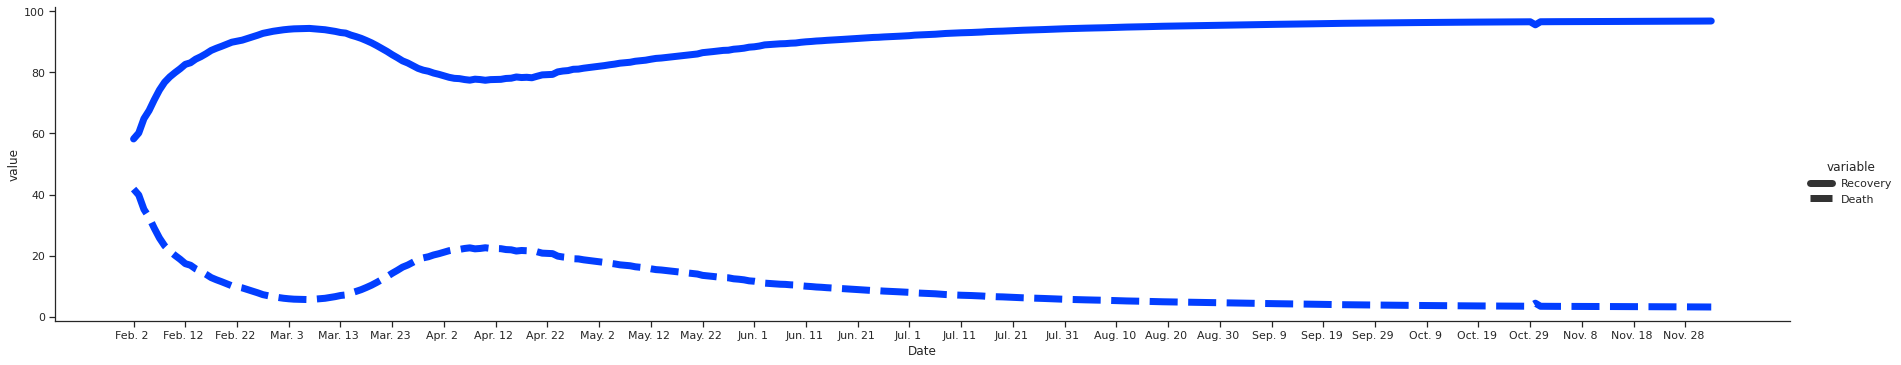

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", rc={"lines.linewidth": 7})
sns.set_palette("bright")
a_plot =sns.relplot(data=df.melt(id_vars=["Date"], value_vars=["Recovery", "Death"]),x="Date", y="value", style="variable",height= 5, aspect = 5, kind="line")
a_plot.set(xticks=[i for i in range(0, 306, 10)])

# **Venn Diagram showing severity of corona virus cases**

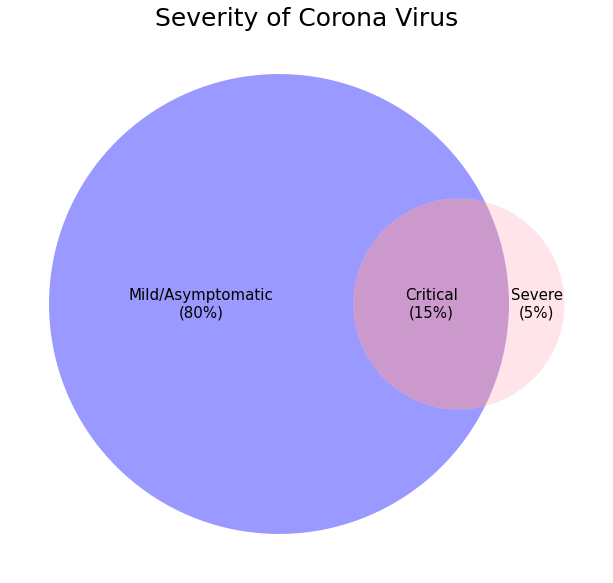

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np


# First way
df = pd.DataFrame({'Product': ['Mild/Asymptomatic', 'Severe', 'Critical'],
                   'NbClient': [80, 5, 15]},
                  columns = ['Product', 'NbClient'])
plt.figure(figsize=(20,10))

v2 = venn2(subsets = {'10': df.loc[0, 'NbClient'],
                      '01': df.loc[1, 'NbClient'],
                      '11': df.loc[2, 'NbClient']},
           set_labels=('', ''))
v2.get_patch_by_id('10').set_color('Blue')
v2.get_patch_by_id('01').set_color('Pink')
v2.get_patch_by_id('11').set_color('Purple')

v2.get_patch_by_id('10').set_edgecolor('none')
v2.get_patch_by_id('01').set_edgecolor('none')
v2.get_patch_by_id('11').set_edgecolor('none')

v2.get_label_by_id('10').set_text('%s\n(%.0f%%)' % (df.loc[0, 'Product'],np.divide(df.loc[0, 'NbClient'],df.NbClient.sum())*100))

v2.get_label_by_id('01').set_text('%s\n(%.0f%%)' % (df.loc[1, 'Product'],np.divide(df.loc[1, 'NbClient'],df.NbClient.sum())*100))

v2.get_label_by_id('11').set_text('%s\n(%.0f%%)' % (df.loc[2, 'Product'], np.divide(df.loc[2, 'NbClient'],df.NbClient.sum())*100))

for text in v2.subset_labels:
    text.set_fontsize(15)
plt.title('Severity of Corona Virus', fontsize = '25')

plt.show()

# **Calendar map of Covid 19 daily cases India**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(<Figure size 900x122.4 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9175c25438>],
       dtype=object))

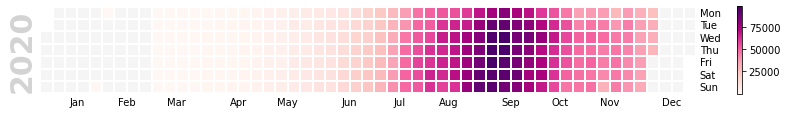

In [ ]:
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
import calplot
numpy_data = np.array((0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,22,2,1,3,5,9,15,8,10,10,11,10,14,20,25,27,58,78,69,94,74,86,73,153,136,120,187,309,424,486,560,579,609,484,573,565,813,871,854,758,1243,1031,886,1061,922,1371,1580,1239,1537,1292,1667,1408,1835,1607,1568,1902,1705,1801,2396,2564,2952,3656,2971,3602,3344,3339,3175,4311,3592,3562,3726,3991,3808,4794,5049,4628,6154,5720,6023,6536,6667,7111,6414,5907,7246,7254,8138,8364,8789,7723,8812,9689,9847,9472,10408,10882,8536,9981,11156,11135,11306,12039,11405,10032,11086,13108,13829,14740,15918,15151,13560,15656,16868,18205,18255,20142,19610,18339,18256,19429,21947,22718,24018,23942,22500,23147,25561,25790,27762,27757,29106,28178,29917,32607,35468,34820,37411,40235,36806,39170,45601,48443,48888,50072,48932,46484,49631,52479,54968,57486,55117,52672,50488,51282,56626,62170,61455,65156,62117,53016,61252,67066,64141,65610,63986,58096,54298,65024,69196,68518,69029,70067,61749,59696,66873,75995,76827,76657,78479,79461,68766,78168,82860,84156,87115,90600,91725,75015,89855,95536,96762,97655,94414,93220,81913,91098,97860,96787,92973,92574,87395,74493,83362,86703,85921,85717,88759,82770,69669,80500,86748,81784,79883,75479,74770,60130,71869,78809,70797,73305,74418,67789,54262,63717,67811,63441,62304,61893,56519,45506,54348,56264,54371,53931,50366,45922,36019,43036,50188,48765,48117,47228,45928,37592,46027,50465,47628,50017,46153,46707,37119,44724,48285,44585,44620,41692,30681,28609,38548,45366,46185,46283,45301,44404,37441,44245,44699,43174,41353,41815,39036,31179,36474,35506,36574,36711,36010,33178,26227,32083,31637,29411),dtype=np.uint32)

all_days = pd.date_range('2/1/2020', periods=314, freq='D')
days = np.random.choice(all_days, 314)
events = pd.Series(data = numpy_data, index=all_days)
calplot.calplot(events, cmap='RdPu')

# **Heat Map of Covid 19 state wise confirmed data of India**

In [ ]:
#@title Data Files Needed
from google.colab import files 
  
  
uploaded = files.upload()
from google.colab import files 
  
  
uploaded = files.upload()
from google.colab import files 
  
  
uploaded = files.upload()
from google.colab import files 
  
  
uploaded = files.upload()
from google.colab import files 
  
  
uploaded = files.upload()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
import geopandas as gpd
from prettytable import PrettyTable

new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
stats = pd.read_csv('Covid_19_India (1).csv', names = new_cols) 
state_data = pd.DataFrame(data = stats, columns = new_cols)
print(state_data)

state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)



    Sr.No                                 States/UT  ...  Recovered  Deceased
0       1               Andaman and Nicobar Islands  ...         61      4631
1       2                            Andhra Pradesh  ...       7038    859624
2       3                         Arunachal Pradesh  ...         55     15653
3       4                                     Assam  ...        995    209345
4       5                                     Bihar  ...       1297    231884
5       6                                Chandigarh  ...        293     16899
6       7                              Chhattisgarh  ...       3010    225633
7       8  Dadra and Nagar Haveli and Daman and Diu  ...          2      3328
8       9                                     Delhi  ...       9706    561732
9      10                                       Goa  ...        701     46778
10     11                                   Gujarat  ...       4095    201580
11     12                                   Haryana  ...       2

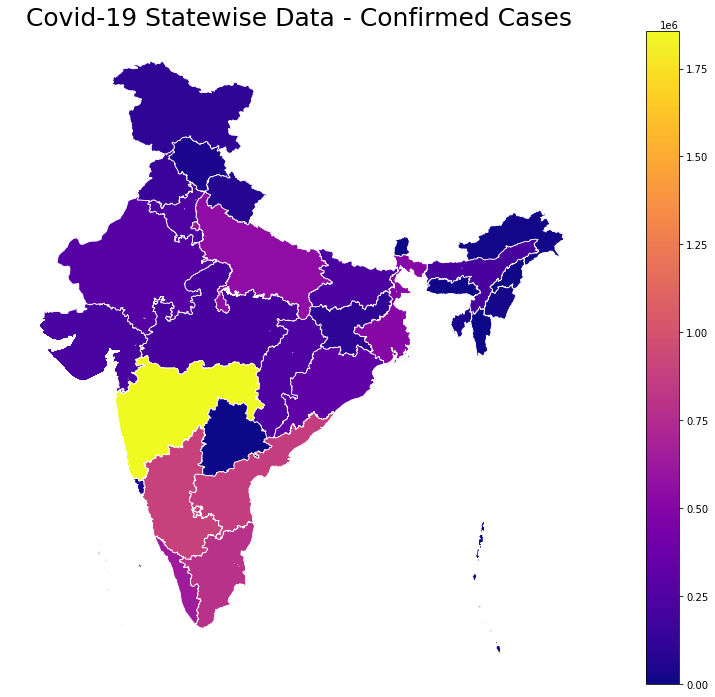

In [ ]:
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '5'})

merged_data.plot(column = 'Confirmed', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='1.0', legend = True)
plt.show()


# **Stacked bar graph showing symptoms of corona virus in India**

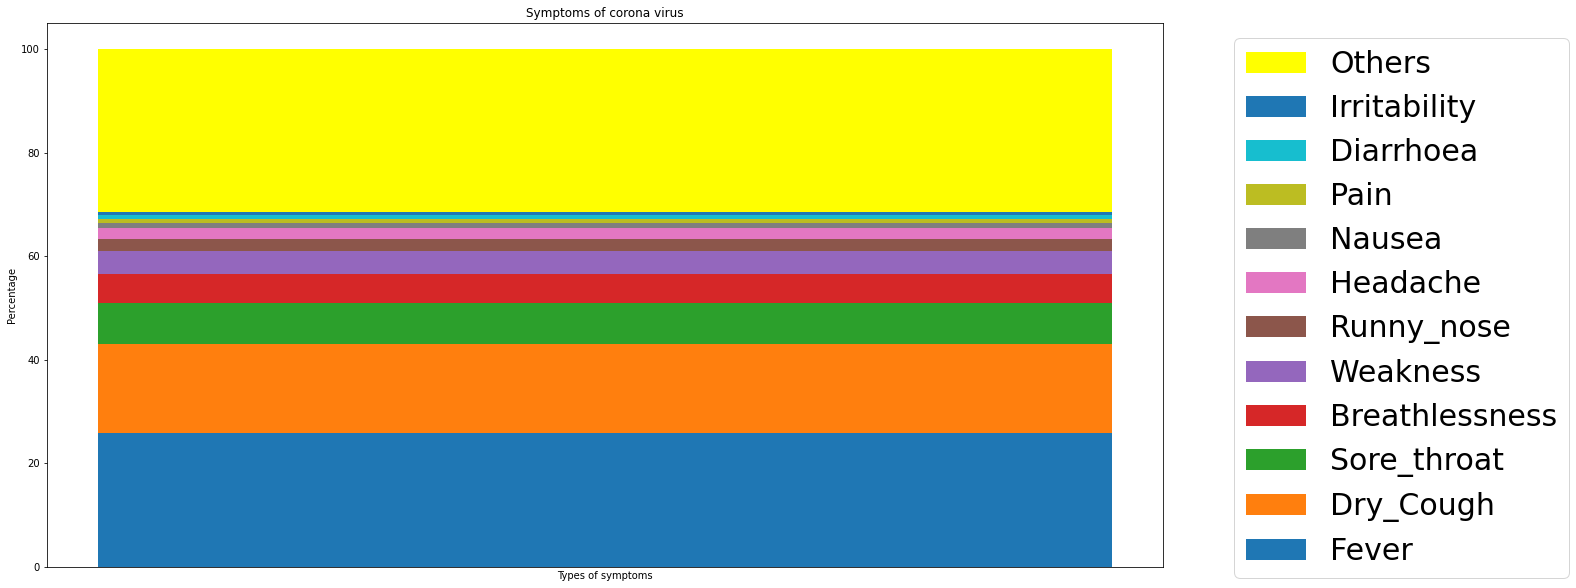

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 1
Fever = 25.93
Dry_Cough = 17.18
Sore_throat = 7.83
Breathlessness = 5.54
Weakness = 4.46
Runny_nose= 2.35
Headache =2.20
Nausea=0.95
Pain= 0.77
Diarrhoea = 0.76
Irritability = 0.53
Others = 31.50

ind = np.arange(N)    # the x locations for the groups
width = 0.05       # the width of the bars: can also be len(x) sequence
names = []


plt.figure(figsize=(20,10))
p1 = plt.bar(ind, Fever, width)
Bar = Fever
p2 = plt.bar(ind, Dry_Cough, width,bottom=Bar)
Bar = Bar + Dry_Cough
p3 = plt.bar(ind, Sore_throat, width,bottom=Bar)
Bar = Bar+ Sore_throat
p4 = plt.bar(ind, Breathlessness , width,bottom=Bar)
Bar = Bar+ Breathlessness
p5 = plt.bar(ind, Weakness, width,bottom=Bar )
Bar = Bar+ Weakness
p6 = plt.bar(ind, Runny_nose, width,bottom=Bar)
Bar = Bar + Runny_nose
p7 = plt.bar(ind, Headache, width,bottom=Bar)
Bar = Bar+Headache
p8 = plt.bar(ind, Nausea, width,bottom=Bar)
Bar =Bar + Nausea
p9 = plt.bar(ind, Pain, width,bottom=Bar)
Bar = Bar + Pain
p10 = plt.bar(ind, Diarrhoea, width,bottom=Bar)
Bar = Bar + Diarrhoea
p11 = plt.bar(ind, Irritability, width,bottom=Bar)
Bar = Bar + Irritability
p12 = plt.bar(ind, Others, width,bottom=Bar, color = 'yellow')
Bar = Bar + Others


plt.ylabel('Percentage')
plt.xlabel('Types of symptoms')
plt.title('Symptoms of corona virus')
plt.xticks(names)
plt.legend((p12[0],p11[0],p10[0], p9[0], p8[0], p7[0], p6[0], p5[0], p4[0], p3[0], p2[0], p1[0]), ("Others","Irritability","Diarrhoea","Pain","Nausea","Headache","Runny_nose","Weakness","Breathlessness",  "Sore_throat","Dry_Cough","Fever"),bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = "30")

plt.show()

# **Donut Chart showing gender wise covid 19 death in a sample of 56288 people**

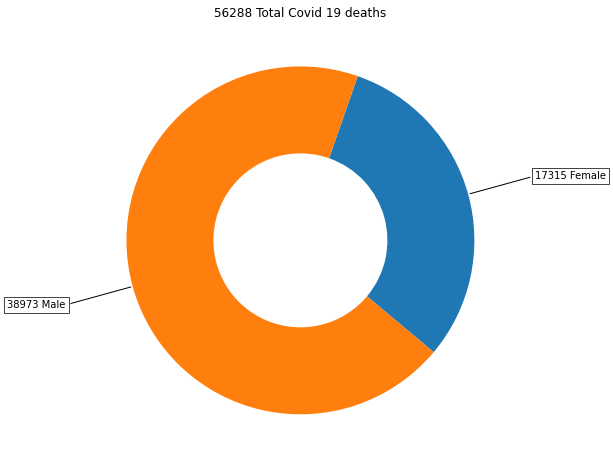

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
Gender = ["17315 Female","38973 Male"]
data = [17315,38973]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(Gender[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("56288 Total Covid 19 deaths")

plt.show()


# Pie Chart for death rate classified according to disease 

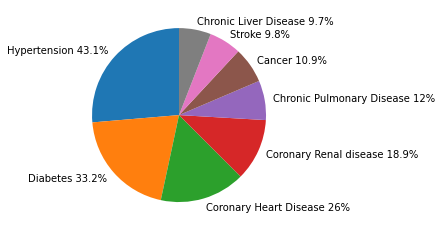

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

percentage = np.array([43.1, 33.2, 26, 18.9, 12, 10.9, 9.8, 9.7])
diseases = ["Hypertension 43.1%", "Diabetes 33.2%", "Coronary Heart Disease 26%", "Coronary Renal disease 18.9%","Chronic Pulmonary Disease 12%","Cancer 10.9%","Stroke 9.8%","Chronic Liver Disease 9.7%"]

plt.pie(percentage, labels= diseases, startangle = 90)
plt.show()

# AgeWise

In [ ]:
USA age wise(https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm#AgeAndSex)

In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files 
  
  
uploaded = files.upload()


Saving age4.csv to age4 (4).csv


In [ ]:
df = p.read_csv("age4.csv")
Range=df['Under 0 year']
Age=df['0']
df

,Under 0 year,0
0,Under 1 year,29
1,1 to 4 years,16
2,5 to 14 years,44
3,15 to 24 years,439
4,25 to 34 years,1852
5,35 to 44 years,4771
6,45 to 54 years,12701
7,55 to 64 years,30875
8,65 to 74 years,53579
9,75 to 84 years,67305


## **Box plot of age vs cases**

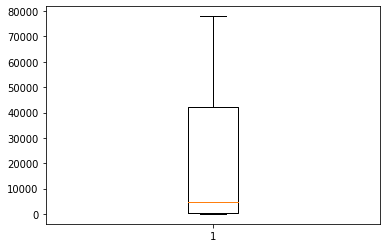

In [ ]:
# Import libraries
 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
df = pd.read_csv(r"age4.csv")
df.head()
Range=df['Under 0 year']
Age=df['0']
# Creating dataset 

# Creating plot 
plt.boxplot(Age) 

# show plot 
plt.show() 


# **Pie chart Of age vs cases**

([<matplotlib.patches.Wedge at 0x7fdd98230400>,
 [Text(3.2999997801153365, 0.001204673704739871, 'Under 1 year'),
  Text(3.299998568265976, 0.003073994552813289, '1 to 4 years'),
  Text(3.2999953052936144, 0.005566420762494223, '5 to 14 years'),
  Text(3.299900467004803, 0.02563021384003605, '15 to 24 years'),
  Text(3.297789251972122, 0.12077271867915072, '25 to 34 years'),
  Text(3.2762778062138804, 0.39497308327323283, '35 to 44 years'),
  Text(3.111184637686141, 1.1002409509856277, '45 to 54 years'),
  Text(2.08103191030038, 2.561114247414893, '55 to 64 years'),
  Text(-1.2263739210612499, 3.063659087715351, '65 to 74 years'),
  Text(-3.120163911680027, -1.074512524007791, '75 to 84 years'),
  Text(1.8344741527884316, -2.743119498445368, '85 years and over')])

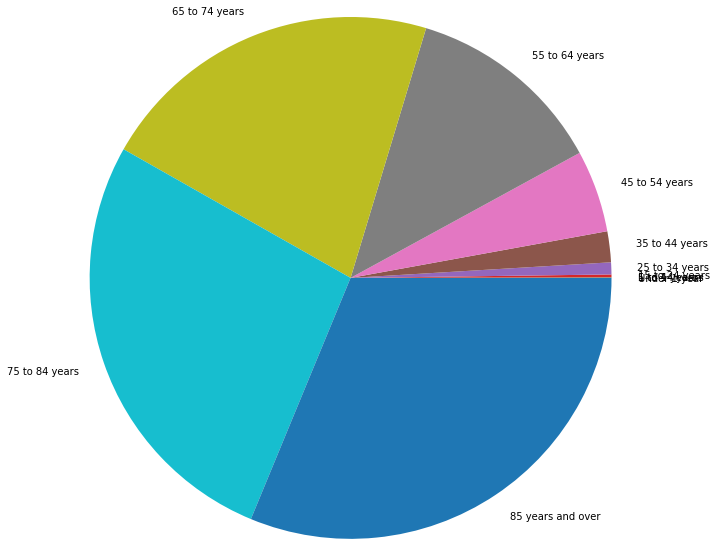

In [ ]:
plt.pie(Age, labels=Range, radius=3)


In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files 
  
  
uploaded = files.upload()

Saving age4.csv to age4 (1).csv


# **Voilin Plot of age vs cases **

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
df = pd.read_csv(r"age4.csv")
df.head()
Range=df['Under 0 year']
Age=df['0']

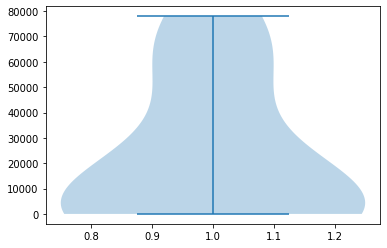

In [ ]:
bp = plt.violinplot(Age)
plt.show()

In [ ]:
INDIA : AGE WISE
https://www.hindustantimes.com/india-news/90-of-those-killed-by-covid-in-india-are-older-than-40-69-are-men/story-glg0Ct4rHQ1YVvZgnckUcM.html

In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files 
  
  
uploaded = files.upload()

Saving age5.csv to age5.csv


In [ ]:
df = p.read_csv("age5.csv")
Range=df['Under 0 year']
Age=df['0']
df

,Under 0 year,0
0,1 to 10 years,289
1,11 to 20 years,397
2,21 to 30 years,1455
3,31 to 40 years,3436
4,41 to 50 years,7538
5,51 to 60 years,14231
6,61 to 70 years,16089
7,71 to 80 years,9554
8,81 to 90 years,2998
9,over 90 years,301


([<matplotlib.patches.Wedge at 0x7fdd982d9588>,
 [Text(3.299570722319962, 0.053226388276157624, '1 to 10 years'),
  Text(3.2951151177877414, 0.17948916548549507, '11 to 20 years'),
  Text(3.2590076809503867, 0.5185257327330869, '21 to 30 years'),
  Text(2.9985358627990646, 1.3779632359057599, '31 to 40 years'),
  Text(1.6612589287221153, 2.851353848918273, '41 to 50 years'),
  Text(-2.0940672520368704, 2.550467083486229, '51 to 60 years'),
  Text(-2.2779837684051736, -2.3876327085384315, '61 to 70 years'),
  Text(2.0474618570046763, -2.5880301281304594, '71 to 80 years'),
  Text(3.233611074898658, -0.6586041423288697, '81 to 90 years'),
  Text(3.2995343318728567, -0.05543638509447921, 'over 90 years')])

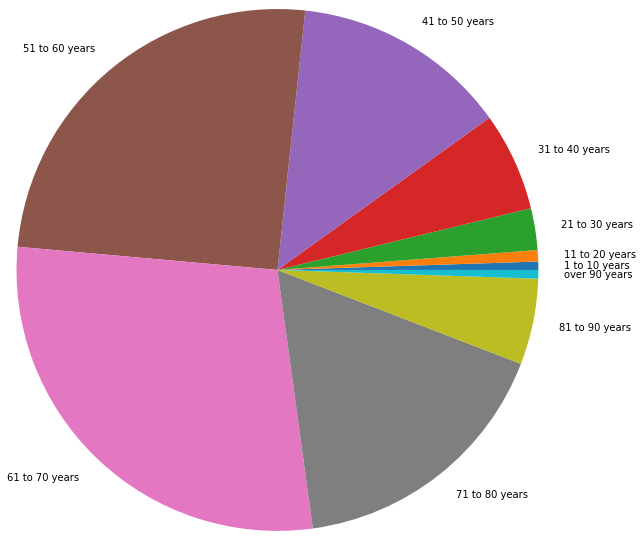

In [ ]:
plt.pie(Age, labels=Range, radius=3)

In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files 
  
  
uploaded = files.upload()

Saving age5.csv to age5 (2).csv


In [ ]:
WORLDWIDE AGE WISE:https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200805-covid-19-sitrep-198.pdf?sfvrsn=f99d1754_2


# **Pie chart of age vs covid world wide**





In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files 
  
  
uploaded = files.upload()

Saving age1.csv to age1 (3).csv


In [ ]:
df = p.read_csv("age1.csv")
Range=df['Under 0 years']
Age=df['0']
df

,Under 0 years,0
0,0 to 4,1.2
1,5 to 14,2.5
2,15 to 24,9.6
3,25 to 64,64.0
4,65 to 85,19.4
5,85+,3.4


([<matplotlib.patches.Wedge at 0x7fdd9810a978>,
 [Text(1.0992199805215392, 0.041417803203778567, '0 to 4'),
  Text(1.0870183363038406, 0.16849669592971364, '5 to 14'),
  Text(0.9471148472512786, 0.5594403150615689, '15 to 24'),
  Text(-1.051468673081021, 0.32313097890675435, '25 to 64'),
  Text(0.7486114746355066, -0.8059657933461273, '65 to 85'),
  Text(1.0937433370194714, -0.11715593337732079, '85+')])

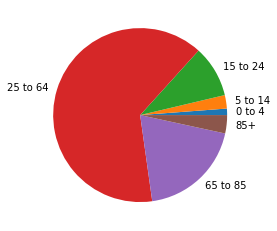

In [ ]:
plt.pie(Age, labels=Range, radius=1)

In [ ]:
mumbai
https://timesofindia.indiatimes.com/city/mumbai/94-covid-deaths-in-mumbai-among-middle-aged-patients-senior-citizens/articleshow/77453775.cms

In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files 
  
  
uploaded = files.upload()

Saving mubai.csv to mubai.csv


In [ ]:
df = p.read_csv("mubai.csv")
Range=df['Under0 years']
Age=df['0']
df

,Under0 years,0
0,0to19,35
1,20to39,384
2,40to59,2426
3,60 to79,3321
4,80 over,479


# **Box plot of age vs covid**

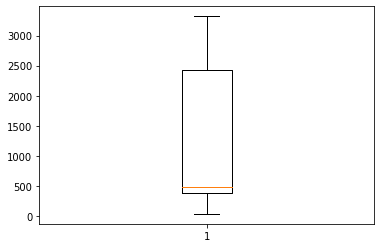

In [ ]:
 
plt.boxplot(Age) 

 
plt.show() 

# Top 20 Cases(World) Bar Graph


In [ ]:
#@title Data files needed
#source : https://covid19.who.int/table
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

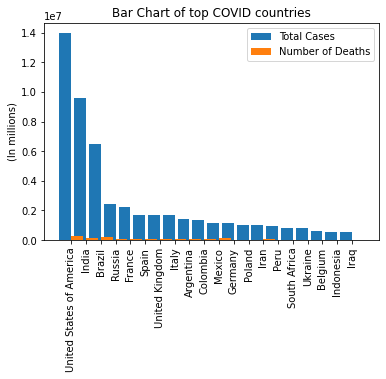

In [ ]:
df = pd.read_csv(r"data.csv")
df.head()
casesList = df.cases.values.tolist()
countryList = df.Name.values.tolist()
deathsList = df.deaths.values.tolist()
xpos = np.arange(len(countryList))
plt.xticks(xpos,countryList)
plt.xticks(rotation=90)
plt.ylabel("(In millions)")
plt.title("Bar Chart of top COVID countries")
plt.bar(xpos - 0.4, casesList, label = "Total Cases")
plt.bar(xpos + 0.4, deathsList, label = "Number of Deaths")
plt.legend()
plt.savefig("Bar1.png")

# Methods of Transmission Bar Graph

In [ ]:
#@title Data files needed
#source : https://covid19.who.int/table
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


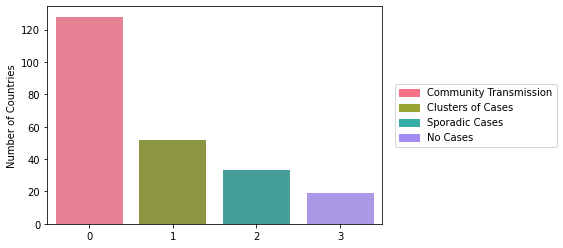

In [ ]:
from matplotlib.patches import Patch
import seaborn as sns


df = pd.read_csv(r"covid.csv")
df.head()

trans = [0,0,0,0]
transClass = df.transmission.values.tolist()
for s in transClass:
  if s == "Community transmission":
    trans[0] += 1
  elif s == "Clusters of cases":
    trans[1] += 1
  elif s == "Sporadic cases":
    trans[2] += 1
  elif s == "No cases":
    trans[3] += 1
  else:
    None
trans
transList = ["Community Transmission", "Clusters of Cases", "Sporadic Cases", "No Cases"]

data = {'Different Modes' : ["Community Transmission", "Clusters of Cases", "Sporadic Cases", "No Cases"],
        'Number of Countries' : trans}
df = pd.DataFrame(data)

colors = sns.color_palette('husl', n_colors=len(df))
p = sns.barplot(x=df.index, y='Number of Countries', data=df, palette=colors)
cmap = dict(zip(df['Different Modes'], colors))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.savefig("Bar2.png")

#Daily New Cases / Recoveries(India) from 30 January 2020 to 10 December 2020

In [ ]:
#@title Data files needed
#source : https://api.covid19india.org/documentation/csv/
from google.colab import files
uploaded = files.upload()

Saving IndiaData.csv to IndiaData.csv


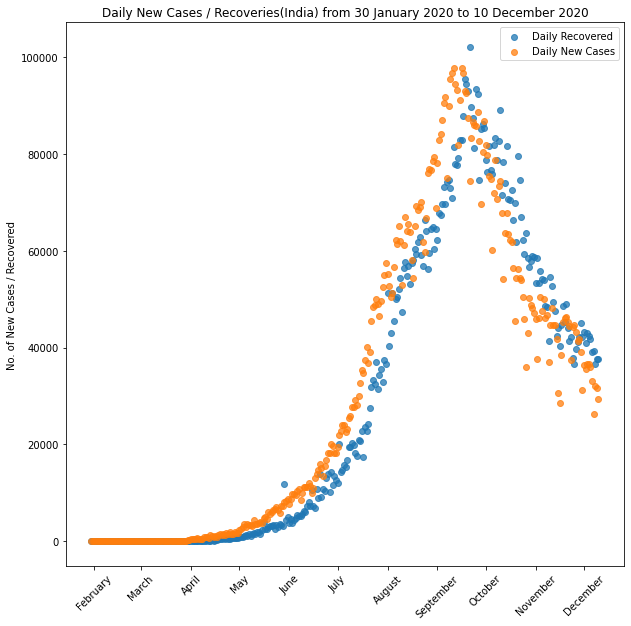

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(10,10))
data = pd.read_csv("IndiaData.csv")
dailyCases = data['Daily Confirmed']
dailyRecovered = data['Daily Recovered']
dailyDeceased = data['Daily Deceased']
days = np.arange(316)
days
dailyCases
plt.scatter(days, dailyRecovered, alpha = 0.75, label = 'Daily Recovered')
plt.scatter(days, dailyCases, alpha = 0.75, label = 'Daily New Cases')
temp = [2, 31, 62, 92, 123, 153, 184, 215, 245, 276, 306]
plt.xticks(temp, ['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
           rotation = 45)
plt.ylabel('No. of New Cases / Recovered')
plt.title('Daily New Cases / Recoveries(India) from 30 January 2020 to 10 December 2020')
plt.legend()
plt.savefig("Scatter.png")

Total cases confirmed vs death vs recovery



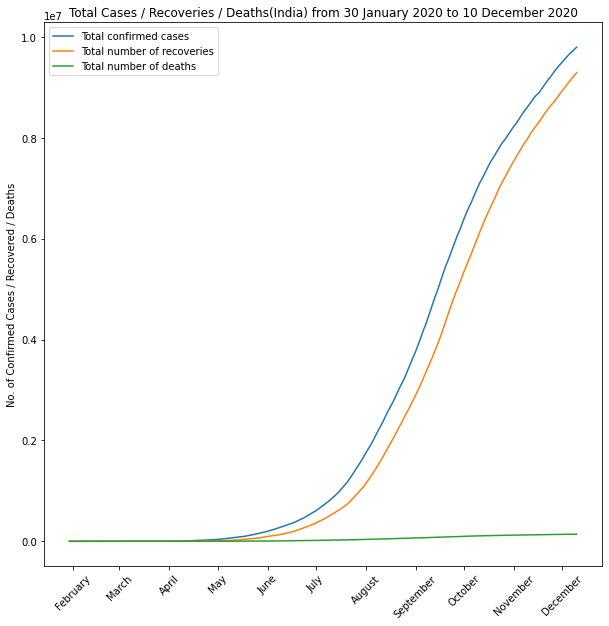

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(10,10))
data = pd.read_csv("case_time_series.csv")
totalCases = data['Total Confirmed']
totalRecovered = data['Total Recovered']
totalDeceased = data['Total Deceased']
days = np.arange(316)
days
dailyCases
plt.plot(days, totalCases, label = 'Total confirmed cases')
plt.plot(days, totalRecovered, label = 'Total number of recoveries')
plt.plot(days, totalDeceased,  label = 'Total number of deaths')
temp = [2, 31, 62, 92, 123, 153, 184, 215, 245, 276, 306]
plt.xticks(temp, ['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
           rotation = 45)
plt.ylabel('No. of Confirmed Cases / Recovered / Deaths')
plt.title('Total Cases / Recoveries / Deaths(India) from 30 January 2020 to 10 December 2020')
plt.legend()

Daily recoveries vs deaths

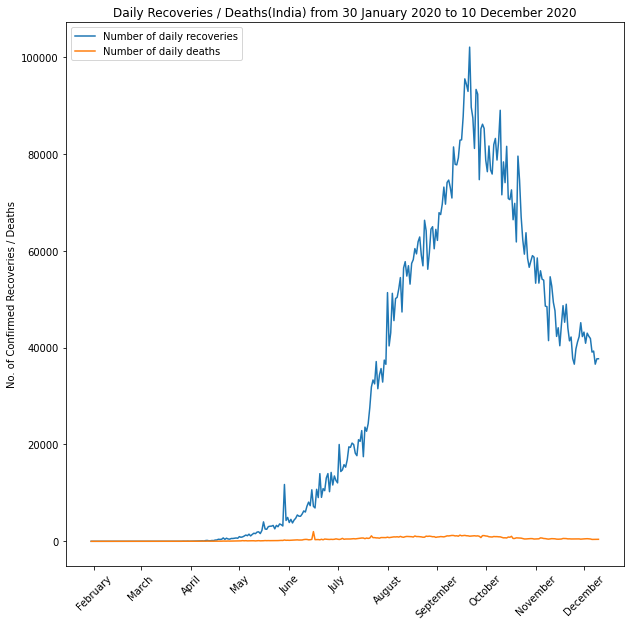

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(10,10))
data = pd.read_csv("case_time_series.csv")
dailyRecovered = data['Daily Recovered']
dailyDeceased = data['Daily Deceased']
days = np.arange(316)
days
dailyCases
plt.plot(days, dailyRecovered, label = 'Number of daily recoveries')
plt.plot(days, dailyDeceased,  label = 'Number of daily deaths')
temp = [2, 31, 62, 92, 123, 153, 184, 215, 245, 276, 306]
plt.xticks(temp, ['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
           rotation = 45)
plt.ylabel('No. of Confirmed Recoveries / Deaths')
plt.title('Daily Recoveries / Deaths(India) from 30 January 2020 to 10 December 2020')
plt.legend()

In [ ]:
pip install calmap

Pyramid plot for covid deaths varied with age

[Text(0, 0.5, 'Age-Group'),
 Text(0.5, 0, 'Population (hundreds of millions)'),
 Text(0.5, 1.0, 'Population Pyramid')]

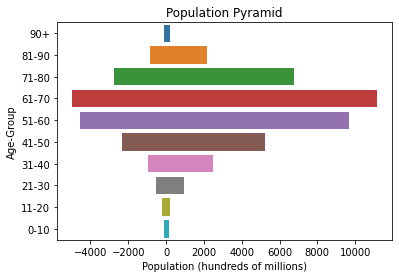

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.DataFrame({'Age': ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','90+'], 
                    'Female': [-109, -195, -529, -952, -2309, -4548, -4947, -2766, -857, -104], 
                    'Male': [180, 202, 926, 2484, 5230, 9683, 11142, 6788, 2147, 197]})


AgeClass = ['90+','81-90','71-80','61-70','51-60','41-50','31-40','21-30','11-20','0-10']

bar_plot = sns.barplot(x='Female', y='Age', data=df, order=AgeClass)

bar_plot = sns.barplot(x='Male', y='Age', data=df, order=AgeClass)

bar_plot.set(xlabel="Population (hundreds of millions)", ylabel="Age-Group", title = "Population Pyramid")